# <font color = blue> IMDb Movie EDA </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

In [0]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [0]:
# Start Spark session (skip if already running in Databricks)
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("IMDB_Movie_EDA").getOrCreate()

# Read CSV using Spark with the provided path
movies = spark.read.csv("/FileStore/tables/imdb/IMDB_Movies.csv", header=True, inferSchema=True)

# Show first 5 rows
movies.show(5)


+--------------------+----------+---------+---------+----------------+------------------+---------------+----------------------+----------------------+----------------------+-----------+---------+---------+-------+----------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----------+------------+---------+----------+----------+----------+-----------+-----------+----------+-----------+-----------+---------+----------+----------+----------+--------+---------+------+------+--------+---------+---------+---------+----------+----------+---------+----------+----------+--------+---------+---------+---------+-------+--------+--------------+---------+
|               Title|title_year|   budget|    Gross|    actor_1_name|      actor_2_name|   actor_3_name|actor_1_facebook_likes|actor_2_facebook_likes|actor_3_facebook_likes|IMDb_rating|  genre_1|  genre_2|genre_3|MetaCritic|Runtime|CVotes10|CVotes09|CVotes08|CVotes07|CVotes06|CVotes05|CVotes04|CVot

In [0]:
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [0]:
# Check the number of rows and columns in the dataframe
# Number of rows and columns
print("Number of rows:", movies.count())
print("Number of columns:", len(movies.columns))

# Print schema
movies.printSchema()

# Show summary statistics for numeric columns
movies.describe().show()



Number of rows: 100
Number of columns: 62
root
 |-- Title: string (nullable = true)
 |-- title_year: integer (nullable = true)
 |-- budget: integer (nullable = true)
 |-- Gross: integer (nullable = true)
 |-- actor_1_name: string (nullable = true)
 |-- actor_2_name: string (nullable = true)
 |-- actor_3_name: string (nullable = true)
 |-- actor_1_facebook_likes: integer (nullable = true)
 |-- actor_2_facebook_likes: integer (nullable = true)
 |-- actor_3_facebook_likes: integer (nullable = true)
 |-- IMDb_rating: double (nullable = true)
 |-- genre_1: string (nullable = true)
 |-- genre_2: string (nullable = true)
 |-- genre_3: string (nullable = true)
 |-- MetaCritic: integer (nullable = true)
 |-- Runtime: integer (nullable = true)
 |-- CVotes10: integer (nullable = true)
 |-- CVotes09: integer (nullable = true)
 |-- CVotes08: integer (nullable = true)
 |-- CVotes07: integer (nullable = true)
 |-- CVotes06: integer (nullable = true)
 |-- CVotes05: integer (nullable = true)
 |-- CVote

In [0]:
# Check the column-wise info of the dataframe
# Print the schema (column names and data types)
movies.printSchema()

# Optionally, get column names and types as a list
print("Column Info:")
for col_name, dtype in movies.dtypes:
    print(f"{col_name}: {dtype}")



root
 |-- Title: string (nullable = true)
 |-- title_year: integer (nullable = true)
 |-- budget: integer (nullable = true)
 |-- Gross: integer (nullable = true)
 |-- actor_1_name: string (nullable = true)
 |-- actor_2_name: string (nullable = true)
 |-- actor_3_name: string (nullable = true)
 |-- actor_1_facebook_likes: integer (nullable = true)
 |-- actor_2_facebook_likes: integer (nullable = true)
 |-- actor_3_facebook_likes: integer (nullable = true)
 |-- IMDb_rating: double (nullable = true)
 |-- genre_1: string (nullable = true)
 |-- genre_2: string (nullable = true)
 |-- genre_3: string (nullable = true)
 |-- MetaCritic: integer (nullable = true)
 |-- Runtime: integer (nullable = true)
 |-- CVotes10: integer (nullable = true)
 |-- CVotes09: integer (nullable = true)
 |-- CVotes08: integer (nullable = true)
 |-- CVotes07: integer (nullable = true)
 |-- CVotes06: integer (nullable = true)
 |-- CVotes05: integer (nullable = true)
 |-- CVotes04: integer (nullable = true)
 |-- CVotes

In [0]:
# Check the summary for the numeric columns 
# Summary statistics for all numeric columns
movies.describe().show()



+-------+----------------+------------------+-------------------+-------------------+------------+------------+------------+----------------------+----------------------+----------------------+-----------------+-------+-------+---------+-----------------+------------------+-----------------+-----------------+-----------------+----------------+------------------+-----------------+-----------------+------------------+------------------+----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+----------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-----------

## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [0]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

from pyspark.sql.functions import col

# Create new columns with values in million dollars
movies = movies.withColumn("gross", col("gross") / 1000000)
movies = movies.withColumn("budget", col("budget") / 1000000)

# Show updated values
movies.select("Title", "gross", "budget").show(5)



+--------------------+----------+------+
|               Title|     gross|budget|
+--------------------+----------+------+
|          La La Land|151.101803|  30.0|
|            Zootopia|341.268248| 150.0|
|                Lion| 51.738905|  12.0|
|             Arrival|100.546139|  47.0|
|Manchester by the...| 47.695371|   9.0|
+--------------------+----------+------+
only showing top 5 rows



In [0]:
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [0]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column
from pyspark.sql.functions import col

# Create a new column 'profit'
movies = movies.withColumn("profit", col("gross") - col("budget"))

# Show updated DataFrame with profit
movies.select("Title", "gross", "budget", "profit").show(5)



+--------------------+----------+------+------------------+
|               Title|     gross|budget|            profit|
+--------------------+----------+------+------------------+
|          La La Land|151.101803|  30.0|121.10180299999999|
|            Zootopia|341.268248| 150.0|191.26824800000003|
|                Lion| 51.738905|  12.0|         39.738905|
|             Arrival|100.546139|  47.0|         53.546139|
|Manchester by the...| 47.695371|   9.0|         38.695371|
+--------------------+----------+------+------------------+
only showing top 5 rows



In [0]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
# Sort the DataFrame by the 'profit' column in descending order
sorted_movies = movies.sort("profit", ascending=False)




In [0]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)
# Get the top 10 profitable movies (rows 0-9)
# Convert to Pandas DataFrame for position-based indexing
sorted_movies_pandas = sorted_movies.toPandas()

top10_pandas = sorted_movies_pandas.iloc[0:10]

# Display the top 10 profitable movies
top10_pandas[['Title', 'gross', 'budget', 'profit']]




,Title,gross,budget,profit
0,Star Wars: Episode VII - The Force Awakens,936.662225,245.0,691.662225
1,The Avengers,623.279547,220.0,403.279547
2,Deadpool,363.024263,58.0,305.024263
3,The Hunger Games: Catching Fire,424.645577,130.0,294.645577
4,Toy Story 3,414.984497,200.0,214.984497
5,The Dark Knight Rises,448.130642,250.0,198.130642
6,The Lego Movie,257.756197,60.0,197.756197
7,Zootopia,341.268248,150.0,191.268248
8,Despicable Me,251.501645,69.0,182.501645
9,Inside Out,356.454367,175.0,181.454367


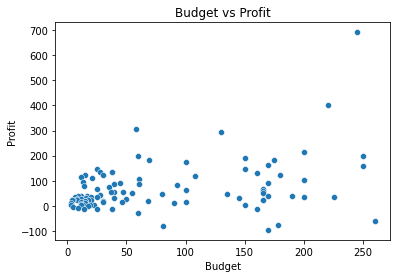

In [0]:
#Plot profit vs budget using scatterplot

# Convert to Pandas DataFrame for plotting
movies_pandas = sorted_movies.toPandas()

# Plot using seaborn or matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='budget', y='profit', data=movies_pandas)
plt.title('Budget vs Profit')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.show()



The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [0]:
#Find the movies with negative profit

# Filter movies with negative profit
neg_profit = movies.filter(col("profit") < 0)

# Show the movies with negative profit
neg_profit.select("Title", "gross", "budget", "profit").show()




+--------------------+----------+------+-------------------+
|               Title|     gross|budget|             profit|
+--------------------+----------+------+-------------------+
|             Tangled|200.807262| 260.0| -59.19273799999999|
|    Edge of Tomorrow|100.189501| 178.0|         -77.810499|
|                Hugo| 73.820094| 170.0|         -96.179906|
|  X-Men: First Class|146.405371| 160.0|-13.594628999999998|
|   The Little Prince|  1.339152|  81.2|         -79.860848|
|Scott Pilgrim vs....|  31.49427|  60.0|          -28.50573|
|                Rush| 26.903709|  38.0|         -11.096291|
|             Warrior| 13.651662|  25.0|         -11.348338|
|             Flipped|  1.752214|  14.0|         -12.247786|
|               Amour|  0.225377|   8.9|          -8.674623|
|Tucker and Dale v...|  0.223838|   5.0|          -4.776162|
+--------------------+----------+------+-------------------+



**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [0]:
# Change the scale of MetaCritic column from 100 to 10

from pyspark.sql.functions import col

# Convert the MetaCritic score from 100 to 10
movies = movies.withColumn("MetaCritic_scaled", col("MetaCritic") / 10)

# Show the updated DataFrame with the scaled MetaCritic score
movies.select("Title", "MetaCritic", "MetaCritic_scaled").show(5)




+--------------------+----------+-----------------+
|               Title|MetaCritic|MetaCritic_scaled|
+--------------------+----------+-----------------+
|          La La Land|        93|              9.3|
|            Zootopia|        78|              7.8|
|                Lion|        69|              6.9|
|             Arrival|        81|              8.1|
|Manchester by the...|        96|              9.6|
+--------------------+----------+-----------------+
only showing top 5 rows



In [0]:
# Find the average ratings including MetaCritic and IMDb_rating

# Create the 'Avg_rating' column as the average of MetaCritic_scaled and IMDb_rating
movies = movies.withColumn("Avg_rating", (col("MetaCritic_scaled") + col("IMDb_rating")) / 2)



In [0]:
#Sort in descending order of average rating
# Sort by 'Avg_rating' in descending order
sorted_movies = movies.sort("Avg_rating", ascending=False)

# Show the sorted DataFrame
sorted_movies.select("Title", "IMDb_rating", "MetaCritic_scaled", "Avg_rating").show()



+--------------------+-----------+-----------------+----------+
|               Title|IMDb_rating|MetaCritic_scaled|Avg_rating|
+--------------------+-----------+-----------------+----------+
|             Boyhood|        7.9|             10.0|      8.95|
|    12 Years a Slave|        8.1|              9.6|      8.85|
|          Inside Out|        8.2|              9.4|       8.8|
|          La La Land|        8.2|              9.3|      8.75|
|Manchester by the...|        7.9|              9.6|      8.75|
|         Toy Story 3|        8.3|              9.2|      8.75|
|             Gravity|        7.8|              9.6|       8.7|
|           Spotlight|        8.1|              9.3|       8.7|
|               Amour|        7.9|              9.4|      8.65|
|            Whiplash|        8.5|              8.8|      8.65|
|     Before Midnight|        7.9|              9.4|      8.65|
|  The Social Network|        7.7|              9.5|       8.6|
|  Mad Max: Fury Road|        8.1|      

In [0]:
# Find the movies with metacritic-rating < 0.5 and also with the average rating of > 8

from pyspark.sql.functions import abs

# Filter movies where the absolute difference between IMDb_rating and MetaCritic_scaled is less than 0.5
filtered_movies = movies.filter(abs(col("IMDb_rating") - col("MetaCritic_scaled")) < 0.5)



**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [0]:
from pyspark.sql.functions import col

# Check if there are any NaN or Null values in the 'actor_x_facebook_likes' columns
nan_check = movies.filter(
    col("actor_1_facebook_likes").isNull() | 
    col("actor_2_facebook_likes").isNull() | 
    col("actor_3_facebook_likes").isNull()
)

# Show rows where any of the 'actor_x_facebook_likes' columns are NaN/Null
nan_check.show()


+--------------+----------+------+----------+--------------------+----------------+---------------+----------------------+----------------------+----------------------+-----------+-------+---------+-------+----------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----------+------------+---------+----------+----------+----------+-----------+-----------+----------+-----------+-----------+---------+----------+----------+----------+--------+---------+------+------+--------+---------+---------+---------+----------+----------+---------+----------+----------+--------+---------+---------+---------+-------+--------+--------------+-------+------------------+-----------------+----------+
|         Title|title_year|budget|     gross|        actor_1_name|    actor_2_name|   actor_3_name|actor_1_facebook_likes|actor_2_facebook_likes|actor_3_facebook_likes|IMDb_rating|genre_1|  genre_2|genre_3|MetaCritic|Runtime|CVotes10|CVotes09|CVotes08|CVotes07|C

In [0]:
# Write your code here
from pyspark.sql.functions import col, coalesce, lit

# Replace NaN/Null values with 0 for the 'actor_x_facebook_likes' columns
movies = movies.withColumn("actor_1_facebook_likes", coalesce(col("actor_1_facebook_likes"), lit(0))) \
               .withColumn("actor_2_facebook_likes", coalesce(col("actor_2_facebook_likes"), lit(0))) \
               .withColumn("actor_3_facebook_likes", coalesce(col("actor_3_facebook_likes"), lit(0)))

# Show the first 5 rows to check if the NaN/Null values have been handled
movies.select("actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes").show(5)



+----------------------+----------------------+----------------------+
|actor_1_facebook_likes|actor_2_facebook_likes|actor_3_facebook_likes|
+----------------------+----------------------+----------------------+
|                 14000|                 19000|                     0|
|                  2800|                 28000|                 27000|
|                 33000|                 96000|                  9800|
|                 35000|                  5300|                     0|
|                   518|                 71000|                  3300|
+----------------------+----------------------+----------------------+
only showing top 5 rows



In [0]:
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,0.0,...,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803,8.75
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248,7.95
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905,7.50
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,0.0,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371,8.75


In [0]:
from pyspark.sql.functions import col, coalesce, lit

# Replace NaN/Null values with 0 for the 'actor_x_facebook_likes' columns and sum the values
movies = movies.withColumn("actor_1_facebook_likes", coalesce(col("actor_1_facebook_likes"), lit(0))) \
               .withColumn("actor_2_facebook_likes", coalesce(col("actor_2_facebook_likes"), lit(0))) \
               .withColumn("actor_3_facebook_likes", coalesce(col("actor_3_facebook_likes"), lit(0))) \
               .withColumn("facebook_likes_combined", 
                           col("actor_1_facebook_likes") + 
                           col("actor_2_facebook_likes") + 
                           col("actor_3_facebook_likes"))

# Show the first 5 rows to check if the NaN/Null values have been handled and the combined likes column is added
movies.select("Title", "actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes", "facebook_likes_combined").show(5)

# Sort by 'facebook_likes_combined' in descending order and get the top 5 trios
top5_trios = movies.sort("facebook_likes_combined", ascending=False).limit(5)

# Show the top 5 trios with the highest combined Facebook likes
top5_trios.select("Title", "actor_1_name", "actor_2_name", "actor_3_name", "facebook_likes_combined").show()


+--------------------+----------------------+----------------------+----------------------+-----------------------+
|               Title|actor_1_facebook_likes|actor_2_facebook_likes|actor_3_facebook_likes|facebook_likes_combined|
+--------------------+----------------------+----------------------+----------------------+-----------------------+
|          La La Land|                 14000|                 19000|                     0|                  33000|
|            Zootopia|                  2800|                 28000|                 27000|                  57800|
|                Lion|                 33000|                 96000|                  9800|                 138800|
|             Arrival|                 35000|                  5300|                     0|                  40300|
|Manchester by the...|                   518|                 71000|                  3300|                  74818|
+--------------------+----------------------+----------------------+----

In [0]:
# Sort by 'facebook_likes_combined' in descending order and get the top 5 trios
top5_trios = movies.sort("facebook_likes_combined", ascending=False).limit(5)

# Show the top 5 trios with the highest combined Facebook likes
top5_trios.select("Title", "actor_1_name", "actor_2_name", "actor_3_name", "facebook_likes_combined").show()


+--------------------+-----------------+------------------+--------------------+-----------------------+
|               Title|     actor_1_name|      actor_2_name|        actor_3_name|facebook_likes_combined|
+--------------------+-----------------+------------------+--------------------+-----------------------+
|                Lion|        Dev Patel|     Nicole Kidman|         Rooney Mara|                 138800|
|           Inception|Leonardo DiCaprio|         Tom Hardy|Joseph Gordon-Levitt|                  79000|
|X-Men: Days of Fu...|Jennifer Lawrence|    Peter Dinklage|        Hugh Jackman|                  76000|
|Manchester by the...|    Casey Affleck|Michelle Williams |       Kyle Chandler|                  74818|
|The Dark Knight R...|        Tom Hardy|    Christian Bale|Joseph Gordon-Levitt|                  73000|
+--------------------+-----------------+------------------+--------------------+-----------------------+



- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`** **2**

- **`Most popular trio after applying the condition:`** **Leonardo DiCaprio	Tom Hardy	Joseph Gordon-Levitt**

Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [0]:
# No. of trios that satisfy the above condition. Display Most popular trio after applying the condition

from pyspark.sql.functions import col

# Filter trios based on the condition that no actor's Facebook likes are less than half of the other two
valid_trios = movies.filter(
    (col("actor_1_facebook_likes") >= 0.5 * col("actor_2_facebook_likes")) & 
    (col("actor_1_facebook_likes") >= 0.5 * col("actor_3_facebook_likes")) &
    (col("actor_2_facebook_likes") >= 0.5 * col("actor_1_facebook_likes")) & 
    (col("actor_2_facebook_likes") >= 0.5 * col("actor_3_facebook_likes")) &
    (col("actor_3_facebook_likes") >= 0.5 * col("actor_1_facebook_likes")) & 
    (col("actor_3_facebook_likes") >= 0.5 * col("actor_2_facebook_likes"))
)

# Calculate the combined Facebook likes for valid trios
valid_trios = valid_trios.withColumn("facebook_likes_combined", 
                                     col("actor_1_facebook_likes") + 
                                     col("actor_2_facebook_likes") + 
                                     col("actor_3_facebook_likes"))

# Sort by 'facebook_likes_combined' in descending order and get the top trio
top_valid_trios = valid_trios.sort("facebook_likes_combined", ascending=False).limit(5)

# Show the top valid trios
top_valid_trios.select("Title", "actor_1_name", "actor_2_name", "actor_3_name", "facebook_likes_combined").show()

# Count the number of valid trios
valid_trios_count = valid_trios.count()
print(f"Number of trios that satisfy the condition: {valid_trios_count}")



+--------------------+-----------------+------------------+--------------------+-----------------------+
|               Title|     actor_1_name|      actor_2_name|        actor_3_name|facebook_likes_combined|
+--------------------+-----------------+------------------+--------------------+-----------------------+
|           Inception|Leonardo DiCaprio|         Tom Hardy|Joseph Gordon-Levitt|                  79000|
|X-Men: Days of Fu...|Jennifer Lawrence|    Peter Dinklage|        Hugh Jackman|                  76000|
|The Dark Knight R...|        Tom Hardy|    Christian Bale|Joseph Gordon-Levitt|                  73000|
|        The Avengers|  Chris Hemsworth| Robert Downey Jr.|  Scarlett Johansson|                  66000|
|Captain America: ...|Robert Downey Jr.|Scarlett Johansson|         Chris Evans|                  51000|
+--------------------+-----------------+------------------+--------------------+-----------------------+

Number of trios that satisfy the condition: 20


- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

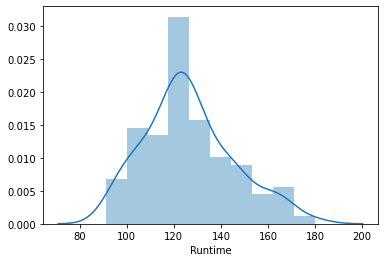

In [0]:
# Runtime histogram/density plot
sns.distplot(movies["Runtime"])
plt.show()

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [0]:
# find the top 10 movies that have the highest number of votes i.e.CVotesU18
# Sort by CVotesU18 in descending order and get the top 10 movies
top_10_movies_by_votes = movies.sort("CVotesU18", ascending=False).limit(10)

# Show the top 10 movies with the highest CVotesU18
top_10_movies_by_votes.select("Title", "CVotesU18").show()





+--------------------+---------+
|               Title|CVotesU18|
+--------------------+---------+
|        Interstellar|     5735|
|           Inception|     5678|
|Guardians of the ...|     5154|
|        The Avengers|     4953|
|The Dark Knight R...|     4726|
|Star Wars: Episod...|     4722|
|            Deadpool|     4598|
|Captain America: ...|     3765|
|The Hunger Games:...|     3650|
|The Wolf of Wall ...|     3622|
+--------------------+---------+



**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?  **Yes**

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [0]:
from pyspark.sql import functions as F

# List of relevant vote columns based on the dataset
cvotes_columns = ['CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01', 
                  'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 
                  'CVotes3044M', 'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF',
                  'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F', 'Votes45A', 
                  'Votes45AM', 'Votes45AF']

# Select the genre columns and vote columns, adding a count column
df_by_genre = movies.select("genre_1", "genre_2", "genre_3", *cvotes_columns)

# Add a 'cnt' column with a constant value of 1
df_by_genre = df_by_genre.withColumn("cnt", F.lit(1))

# Show the first few rows to verify
df_by_genre.show(5)


+---------+---------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----------+------------+---------+----------+----------+----------+-----------+-----------+----------+-----------+-----------+---------+----------+----------+----------+--------+---------+------+------+--------+---------+---------+---------+----------+----------+---------+----------+----------+--------+---------+---------+---+
|  genre_1|  genre_2|genre_3|CVotes10|CVotes09|CVotes08|CVotes07|CVotes06|CVotes05|CVotes04|CVotes03|CVotes02|CVotes01|CVotesMale|CVotesFemale|CVotesU18|CVotesU18M|CVotesU18F|CVotes1829|CVotes1829M|CVotes1829F|CVotes3044|CVotes3044M|CVotes3044F|CVotes45A|CVotes45AM|CVotes45AF|CVotes1000|CVotesUS|CVotesnUS|VotesM|VotesF|VotesU18|VotesU18M|VotesU18F|Votes1829|Votes1829M|Votes1829F|Votes3044|Votes3044M|Votes3044F|Votes45A|Votes45AM|Votes45AF|cnt|
+---------+---------+-------+--------+--------+--------+--------+--------+--------+--------+--------+---

In [0]:
# Create a column cnt and initialize it to 1

from pyspark.sql import functions as F

# Create the 'cnt' column and initialize it to 1
df_by_genre = df_by_genre.withColumn("cnt", F.lit(1))

# Show the updated dataframe to verify
df_by_genre.show(5)



+---------+---------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----------+------------+---------+----------+----------+----------+-----------+-----------+----------+-----------+-----------+---------+----------+----------+----------+--------+---------+------+------+--------+---------+---------+---------+----------+----------+---------+----------+----------+--------+---------+---------+---+
|  genre_1|  genre_2|genre_3|CVotes10|CVotes09|CVotes08|CVotes07|CVotes06|CVotes05|CVotes04|CVotes03|CVotes02|CVotes01|CVotesMale|CVotesFemale|CVotesU18|CVotesU18M|CVotesU18F|CVotes1829|CVotes1829M|CVotes1829F|CVotes3044|CVotes3044M|CVotes3044F|CVotes45A|CVotes45AM|CVotes45AF|CVotes1000|CVotesUS|CVotesnUS|VotesM|VotesF|VotesU18|VotesU18M|VotesU18F|Votes1829|Votes1829M|Votes1829F|Votes3044|Votes3044M|Votes3044F|Votes45A|Votes45AM|Votes45AF|cnt|
+---------+---------+-------+--------+--------+--------+--------+--------+--------+--------+--------+---

In [0]:
# Group the movies by individual genres

df_by_g1 = df_by_genre.groupby("genre_1").sum()
df_by_g2 = df_by_genre.groupby("genre_2").sum()
df_by_g3 = df_by_genre.groupby("genre_3").sum()

In [0]:
# Add the grouped data frames and store it in a new data frame
from pyspark.sql import functions as F

# Perform union on the dataframes
df_combined = df_by_g1.unionByName(df_by_g2, allowMissingColumns=True).unionByName(df_by_g3, allowMissingColumns=True)

# Group by the genres and sum the numeric columns
df_add = df_combined.groupBy('genre_1', 'genre_2', 'genre_3').agg(
    *[F.sum(c).alias(c) for c in df_combined.columns if c not in ['genre_1', 'genre_2', 'genre_3']]
)

# Show the result to verify
df_add.show(5)



+---------+-------+-------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+---------------+-----------------+--------------+---------------+---------------+---------------+----------------+----------------+---------------+----------------+----------------+--------------+---------------+---------------+---------------+-------------+--------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+---------------+-----------------+------------------+-----------------+-----------------+--------+
|  genre_1|genre_2|genre_3|sum(CVotes10)|sum(CVotes09)|sum(CVotes08)|sum(CVotes07)|sum(CVotes06)|sum(CVotes05)|sum(CVotes04)|sum(CVotes03)|sum(CVotes02)|sum(CVotes01)|sum(CVotesMale)|sum(CVotesFemale)|sum(CVotesU18)|sum(CVotesU18M)|sum(CVotesU18F)|sum(CVotes1829)|sum(CVotes1829M)|sum(CVotes1829

In [0]:
# Get and display genres with atleast 10 occurences
# Group by the genre columns and count the occurrences
df_genre_counts = df_add.groupBy('genre_1', 'genre_2', 'genre_3').agg(
    F.count('*').alias('cnt')
)

# Filter the genres with at least 10 occurrences
df_genres_10_or_more = df_genre_counts.filter(df_genre_counts.cnt >= 10)

# Show the result
df_genres_10_or_more.show()



+-------+-------+-------+---+
|genre_1|genre_2|genre_3|cnt|
+-------+-------+-------+---+
+-------+-------+-------+---+



In [0]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Sci-Fi,2325284.0,2530855.0,3002994.0,1802098.0,671811.0,254175.0,111925.0,65904.0,46171.0,114435.0,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17.0
Romance,549959.0,689492.0,1069280.0,712841.0,281289.0,110901.0,48913.0,27698.0,19200.0,40075.0,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13.0
Thriller,1081701.0,1465491.0,1993378.0,1175799.0,416046.0,149953.0,65281.0,37940.0,25767.0,57630.0,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0


In [0]:
# Assuming your original dataframe is df_add
# First, we need to group by the genre columns and count occurrences for each genre
df_with_cnt = df_add.groupBy('genre_1', 'genre_2', 'genre_3').count().withColumnRenamed('count', 'cnt')

# Show the new dataframe with the cnt column
df_with_cnt.show()


+---------+---------+-------+---+
|  genre_1|  genre_2|genre_3|cnt|
+---------+---------+-------+---+
|    Crime|     null|   null|  1|
|Adventure|     null|   null|  1|
|    Drama|     null|   null|  1|
|  Mystery|     null|   null|  1|
|Animation|     null|   null|  1|
|Biography|     null|   null|  1|
|   Comedy|     null|   null|  1|
|   Action|     null|   null|  1|
|     null|    Crime|   null|  1|
|     null|  Romance|   null|  1|
|     null| Thriller|   null|  1|
|     null|Adventure|   null|  1|
|     null|     null|   null|  1|
|     null|    Drama|   null|  1|
|     null|      War|   null|  1|
|     null|   Family|   null|  1|
|     null|  Fantasy|   null|  1|
|     null|  History|   null|  1|
|     null|  Mystery|   null|  1|
|     null|  Musical|   null|  1|
+---------+---------+-------+---+
only showing top 20 rows



In [0]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,...,7.712308,7.709231,7.720000,7.643077,7.620000,7.741538,7.223077,7.936923,7.784615,65.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38.0
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,23.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,18.0
Sci-Fi,136781.411765,148873.823529,176646.705882,106005.764706,39518.294118,14951.470588,6583.823529,3876.705882,2715.941176,6731.470588,...,7.858824,7.852941,7.835294,7.711765,7.694118,7.735294,7.523529,8.088235,7.882353,17.0
Romance,42304.538462,53037.846154,82252.307692,54833.923077,21637.615385,8530.846154,3762.538462,2130.615385,1476.923077,3082.692308,...,7.607692,7.607692,7.661538,7.523077,7.500000,7.607692,6.915385,7.830769,7.700000,13.0
Thriller,83207.769231,112730.076923,153336.769231,90446.076923,32003.538462,11534.846154,5021.615385,2918.461538,1982.076923,4433.076923,...,7.738462,7.746154,7.700000,7.661538,7.638462,7.746154,7.400000,7.930769,7.807692,13.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,11.0
Crime,52229.636364,87919.818182,129045.000000,74671.818182,25308.272727,8971.818182,3842.818182,2246.636364,1544.090909,3383.363636,...,7.718182,7.763636,7.609091,7.627273,7.618182,7.681818,7.390909,7.981818,7.800000,11.0


In [0]:
# Rounding off the columns of Votes to two decimals

from pyspark.sql import functions as F

# Identify columns that contain 'Votes' in their name
vote_columns = [col for col in df_add.columns if 'Votes' in col]

# Round each of the vote columns to two decimal places
df_rounded = df_add.select(
    *[
        (F.round(F.col(col), 2).alias(col) if col in vote_columns else F.col(col)) 
        for col in df_add.columns
    ]
)

# Show the resulting dataframe with rounded vote columns
df_rounded.show()



+---------+---------+-------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+---------------+-----------------+--------------+---------------+---------------+---------------+----------------+----------------+---------------+----------------+----------------+--------------+---------------+---------------+---------------+-------------+--------------+-----------+-----------+-------------+--------------+--------------+--------------+---------------+---------------+--------------+---------------+---------------+-------------+--------------+--------------+--------+
|  genre_1|  genre_2|genre_3|sum(CVotes10)|sum(CVotes09)|sum(CVotes08)|sum(CVotes07)|sum(CVotes06)|sum(CVotes05)|sum(CVotes04)|sum(CVotes03)|sum(CVotes02)|sum(CVotes01)|sum(CVotesMale)|sum(CVotesFemale)|sum(CVotesU18)|sum(CVotesU18M)|sum(CVotesU18F)|sum(CVotes1829)|sum(CVotes1829M)|sum(CVotes1829F)|sum(CVotes3044)|sum(CVotes3044M)|sum(CVote

In [0]:
# Converting CVotes to int type
from pyspark.sql import functions as F

# Identify columns that contain 'CVotes' in their name
cvote_columns = [col for col in df_add.columns if 'CVotes' in col]

# Convert each of the CVotes columns to integer type
df_cvotes_int = df_add.select(
    *[
        (F.col(col).cast('int').alias(col) if col in cvote_columns else F.col(col)) 
        for col in df_add.columns
    ]
)

# Show the resulting dataframe with CVotes columns as integers
df_cvotes_int.show()


+---------+---------+-------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+---------------+-----------------+--------------+---------------+---------------+---------------+----------------+----------------+---------------+----------------+----------------+--------------+---------------+---------------+---------------+-------------+--------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------+
|  genre_1|  genre_2|genre_3|sum(CVotes10)|sum(CVotes09)|sum(CVotes08)|sum(CVotes07)|sum(CVotes06)|sum(CVotes05)|sum(CVotes04)|sum(CVotes03)|sum(CVotes02)|sum(CVotes01)|sum(CVotesMale)|sum(CVotesFemale)|sum(CVotesU18)|sum(CVotesU18M)|sum(CVotesU18F)|sum(CVotes1829)|sum(CVotes1829M)

If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

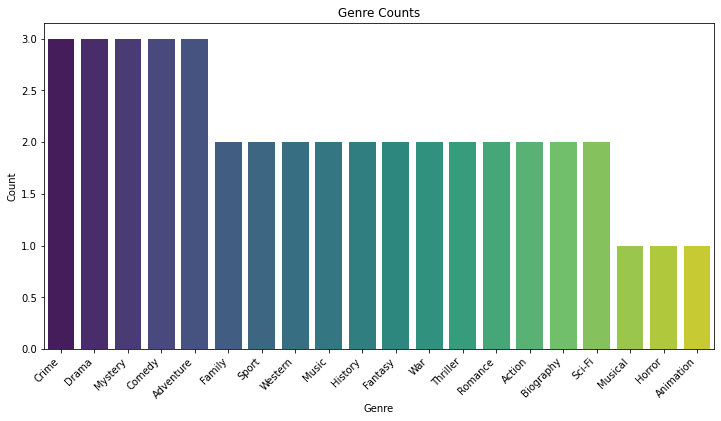

In [0]:
# Countplot for genres
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_add contains a 'cnt' column that holds the count of occurrences for each genre
# Melt the genres into a single column to make counting easier
df_pandas = df_add.toPandas()
genres = df_pandas[['genre_1', 'genre_2', 'genre_3']].melt(value_name='Genre')

# Remove NaN values for genres (if any)
genres = genres.dropna()

# Calculate the count of occurrences of each genre
genre_counts = genres['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'cnt']

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts, x='Genre', y='cnt', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


**`Checkpoint 5:`** Is the bar for `Drama` the tallest? **Yes**

In [0]:
# find the most popular genre

# Find the most popular genre by sorting the counts and picking the first one
most_popular_genre = genre_counts.sort_values(by='cnt', ascending=False).iloc[0]

# Display the most popular genre
print(f"The most popular genre is '{most_popular_genre['Genre']}' with {most_popular_genre['cnt']} movies.")


The most popular genre is 'Crime' with 3 movies.


-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

+---------+---------+--------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+
|  genre_1|  genre_2| genre_3|    avg_CVotesU18M|   avg_CVotes1829M|   avg_CVotes3044M|    avg_CVotes45AM|   avg_CVotesU18F|  avg_CVotes1829F|  avg_CVotes3044F|   avg_CVotes45AF|    avg_male_votes|
+---------+---------+--------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+
|   Action| Thriller|    null|            4023.0|          425041.0|          299862.0|           46968.0|            672.0|          79826.0|          43434.0|           7741.0|          193973.5|
|   Action|   Sci-Fi|    null|            3767.0|          343012.0|          247617.0|           44183.0|           1150.0|          85465.0|          43303.0|           9138.0|         159644.75|
|    Drama

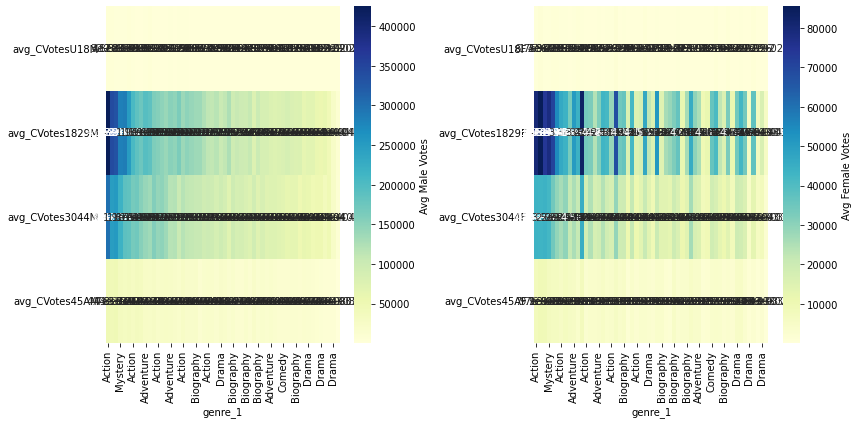

In [0]:
# 1st set of heat maps for CVotes-related columns

# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a Spark session
spark = SparkSession.builder.appName('MovieAnalysis').getOrCreate()

# Load your movie data into a DataFrame (adjust the path to your file)
df = spark.read.csv("/FileStore/tables/imdb/IMDB_Movies.csv", header=True, inferSchema=True)

# Group by genre and calculate the average vote counts for males and females
df_genre_avg = df.groupby('genre_1', 'genre_2', 'genre_3') \
    .agg(
        F.avg('CVotesU18M').alias('avg_CVotesU18M'),
        F.avg('CVotes1829M').alias('avg_CVotes1829M'),
        F.avg('CVotes3044M').alias('avg_CVotes3044M'),
        F.avg('CVotes45AM').alias('avg_CVotes45AM'),
        F.avg('CVotesU18F').alias('avg_CVotesU18F'),
        F.avg('CVotes1829F').alias('avg_CVotes1829F'),
        F.avg('CVotes3044F').alias('avg_CVotes3044F'),
        F.avg('CVotes45AF').alias('avg_CVotes45AF')
    )

# Now, create a column with the average male votes (you can also choose other columns for filtering)
df_genre_avg = df_genre_avg.withColumn(
    'avg_male_votes', 
    (F.col('avg_CVotesU18M') + F.col('avg_CVotes1829M') + F.col('avg_CVotes3044M') + F.col('avg_CVotes45AM')) / 4
)

# Sort by the average male votes to get the top 10 genres
df_genre_avg_sorted = df_genre_avg.orderBy('avg_male_votes', ascending=False)

# Show the top 10 genres
df_genre_avg_sorted.show(10)

# Convert to Pandas DataFrame for heatmap
df_pandas = df_genre_avg_sorted.toPandas()

# Plotting heatmaps
plt.figure(figsize=(12, 6))

# Heatmap for Male Votes
plt.subplot(1, 2, 1)
sns.heatmap(df_pandas[['genre_1', 'avg_CVotesU18M', 'avg_CVotes1829M', 'avg_CVotes3044M', 'avg_CVotes45AM']].set_index('genre_1').transpose(),
            annot=True, cmap="YlGnBu", cbar_kws={'label': 'Avg Male Votes'})

# Heatmap for Female Votes
plt.subplot(1, 2, 2)
sns.heatmap(df_pandas[['genre_1', 'avg_CVotesU18F', 'avg_CVotes1829F', 'avg_CVotes3044F', 'avg_CVotes45AF']].set_index('genre_1').transpose(),
            annot=True, cmap="YlGnBu", cbar_kws={'label': 'Avg Female Votes'})

plt.tight_layout()
plt.show()



**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- **Inference 1**: Sci-Fi also appears to be the most popular category among males and females of age 30-44 and above 45 as well (also applies for males and females of age under 18)

- **Inference 2**: Thriller and action seem to the second and adventure seems to be the third favourtie category among males of age 18-29 (animation seems to be the least favourite) whereas adventure seems to be the second and animation seems to be the thrid favourite category among females of age 18-29 (crime seems to be the least favourite). This implies that males of age 18-29 would rather watch any other genre of movie than animation whereas the females of age 18-29 would rather watch any other genre of movie than crime 

- **Inference 3**: Males of age under 18 like romantic movies the least whereas thats not the case with females under 18, who like crime movies the least.

- **Inference 4**: Crime movies are generally the least favourite among females of all ages except when they turn above 45. They somehow like crime movies more than animated movies which used to be their favourite in their younger days. 

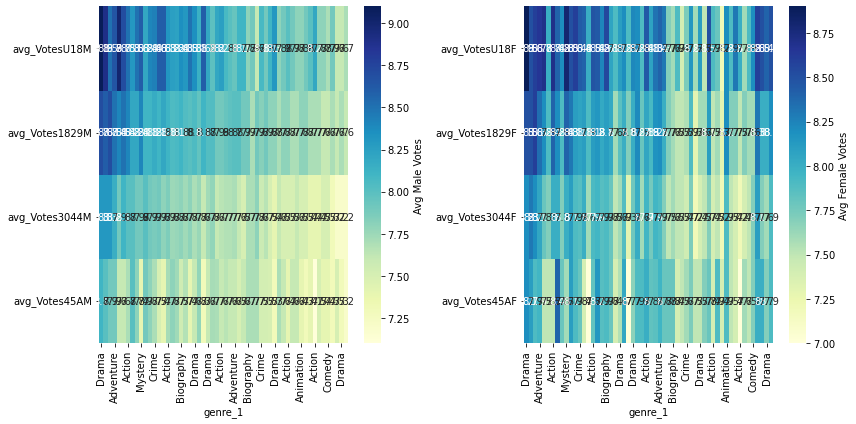

In [0]:
# 2nd set of heat maps for Votes-related columns
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Group by genre and calculate the average votes for males and females (Votes-related columns)
df_genre_avg_votes = df.groupby('genre_1', 'genre_2', 'genre_3') \
    .agg(
        F.avg('VotesU18M').alias('avg_VotesU18M'),
        F.avg('Votes1829M').alias('avg_Votes1829M'),
        F.avg('Votes3044M').alias('avg_Votes3044M'),
        F.avg('Votes45AM').alias('avg_Votes45AM'),
        F.avg('VotesU18F').alias('avg_VotesU18F'),
        F.avg('Votes1829F').alias('avg_Votes1829F'),
        F.avg('Votes3044F').alias('avg_Votes3044F'),
        F.avg('Votes45AF').alias('avg_Votes45AF')
    )

# Create the 'avg_male_votes' column as an average of all male vote categories
df_genre_avg_votes = df_genre_avg_votes.withColumn(
    'avg_male_votes', 
    (F.col('avg_VotesU18M') + F.col('avg_Votes1829M') + F.col('avg_Votes3044M') + F.col('avg_Votes45AM')) / 4
)

# Sort by the average male votes to get the top 10 genres
df_genre_avg_votes_sorted = df_genre_avg_votes.orderBy('avg_male_votes', ascending=False)

# Convert to Pandas DataFrame for heatmap
df_pandas_votes = df_genre_avg_votes_sorted.toPandas()

# Plotting heatmaps for Votes-related columns
plt.figure(figsize=(12, 6))

# Heatmap for Male Votes
plt.subplot(1, 2, 1)
sns.heatmap(df_pandas_votes[['genre_1', 'avg_VotesU18M', 'avg_Votes1829M', 'avg_Votes3044M', 'avg_Votes45AM']].set_index('genre_1').transpose(),
            annot=True, cmap="YlGnBu", cbar_kws={'label': 'Avg Male Votes'})

# Heatmap for Female Votes
plt.subplot(1, 2, 2)
sns.heatmap(df_pandas_votes[['genre_1', 'avg_VotesU18F', 'avg_Votes1829F', 'avg_Votes3044F', 'avg_Votes45AF']].set_index('genre_1').transpose(),
            annot=True, cmap="YlGnBu", cbar_kws={'label': 'Avg Female Votes'})

plt.tight_layout()
plt.show()



**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- **Inference 1**:Sci-Fi appears to be the highest rated genre in males of all age groups whereas for females, after being 18+, the highest rated genre becomes animation for all other age groups.

- **Inference 2**: For males, animated movies are the least rated for age group under 18 whereas romantic movies become the least rated for all other age groups. For females, crime movies remain the least rated for all age groups except 45+ where that place is shockingly taken by romantic movies

- **Inference 3**:In general, people, irrespective of age and gender like movies more when they are younger and that liking and the tendency to give higher rating decreases over time, thereby decreasing the average rating of age groups if we go from under 18 to 45+

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [0]:
# Creating IFUS column
#initializing all columns with USA

movies["IFUS"] = "USA" 

#changing all values where country != USA
movies.loc[movies["Country"] != "USA","IFUS"] = "non-USA" 
movies


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,facebook_likes_combined,IFUS
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,0.0,...,7.5,7.1,8.3,8.1,PG-13,USA,121.101803,8.75,33000.0,USA
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.6,8.0,8.0,PG,USA,191.268248,7.95,57800.0,USA
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905,7.50,138800.0,non-USA
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,0.0,...,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05,40300.0,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.1,7.9,7.8,R,USA,38.695371,8.75,74818.0,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65,25505.0,USA
96,Before Midnight,2013,3.0,8.114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.2,7.0,8.0,7.9,R,USA,5.114507,8.65,251.0,USA
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10,143.0,USA
98,Harry Potter and the Deathly Hallows: Part I,2010,150.0,296.347721,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,8.0,6.7,7.9,7.5,PG-13,UK,146.347721,7.10,13000.0,non-USA


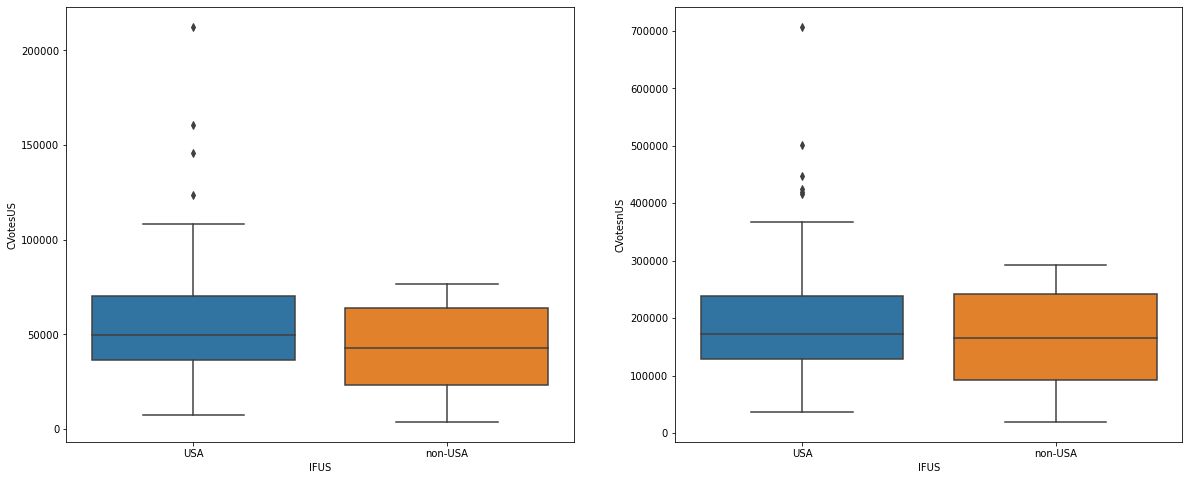

In [0]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(x=movies["IFUS"],y=movies["CVotesUS"])
plt.subplot(1,2,2)
sns.boxplot(x=movies["IFUS"],y=movies["CVotesnUS"])
plt.show()

**`Inferences:`** Write your two inferences/observations below:
- Inference 1: From both plots, we can see that non-USA plot's IQR is slightly larger thant USA people plot
- Inference 2: From both plots, there seem to be some outliers in USA plot, suggesting that some USA movies got exceptionally high votes from USA and non-USA people

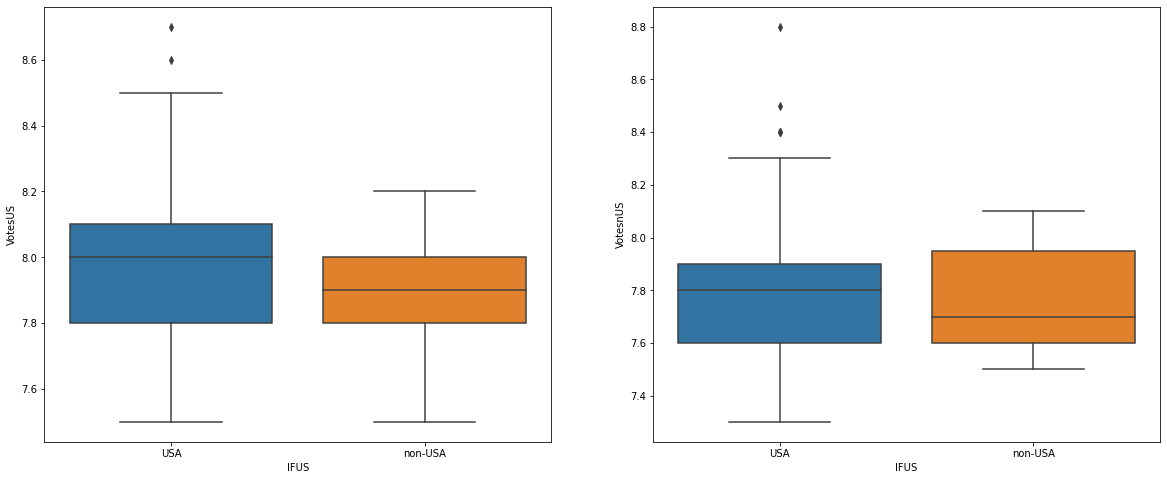

In [0]:
# Box plot - 2: VotesUS(y) vs IFUS(x)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(x=movies["IFUS"],y=movies["VotesUS"])
plt.subplot(1,2,2)
sns.boxplot(x=movies["IFUS"],y=movies["VotesnUS"])
plt.show()


**`Inferences:`** Write your two inferences/observations below:
- Inference 1: From both plots, we can see that there are some USA movies that have got exceptionally high rating from USA and non-USA people (outliers in USA plot)
- Inference 2: From both plots, USA people have roughly given ratings to non-USA movies in range (7.8-8) and USA movies in range (7.8-8.1) whereas non-USA people have roughly given ratings to non-USA movies in range(7.6-8) and USA movies in range(7.6-7.9). There seems to be trend here that states that USA people will rate USA movies higher and non-USA people will rate non-USA movies higher

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [0]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,52375.0,75928.0,109339.0,66456.0,23528.0,8497.0,3622.0,2078.0,1449.0,3250.0,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Adventure,94596.0,105636.0,138482.0,86367.0,31896.0,11551.0,4817.0,2718.0,1835.0,4575.0,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Action,102144.0,114433.0,150895.0,94262.0,34688.0,12693.0,5386.0,3064.0,2115.0,5524.0,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Comedy,60157.0,77173.0,108993.0,69176.0,26099.0,9863.0,4237.0,2444.0,1712.0,3842.0,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Biography,47333.0,77867.0,123948.0,74054.0,23644.0,7702.0,2984.0,1639.0,1145.0,2849.0,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Sci-Fi,136781.0,148873.0,176646.0,106005.0,39518.0,14951.0,6583.0,3876.0,2715.0,6731.0,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Romance,42304.0,53037.0,82252.0,54833.0,21637.0,8530.0,3762.0,2130.0,1476.0,3082.0,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
Thriller,83207.0,112730.0,153336.0,90446.0,32003.0,11534.0,5021.0,2918.0,1982.0,4433.0,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
Animation,61960.0,72566.0,104837.0,65707.0,22825.0,7551.0,2792.0,1430.0,911.0,2290.0,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Crime,52229.0,87919.0,129045.0,74671.0,25308.0,8971.0,3842.0,2246.0,1544.0,3383.0,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0


In [0]:
# Sorting by CVotes1000
genre_top10.sort_values(by='CVotes1000',ascending=False)


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Sci-Fi,136781.0,148873.0,176646.0,106005.0,39518.0,14951.0,6583.0,3876.0,2715.0,6731.0,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Action,102144.0,114433.0,150895.0,94262.0,34688.0,12693.0,5386.0,3064.0,2115.0,5524.0,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Thriller,83207.0,112730.0,153336.0,90446.0,32003.0,11534.0,5021.0,2918.0,1982.0,4433.0,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
Adventure,94596.0,105636.0,138482.0,86367.0,31896.0,11551.0,4817.0,2718.0,1835.0,4575.0,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Crime,52229.0,87919.0,129045.0,74671.0,25308.0,8971.0,3842.0,2246.0,1544.0,3383.0,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Comedy,60157.0,77173.0,108993.0,69176.0,26099.0,9863.0,4237.0,2444.0,1712.0,3842.0,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Biography,47333.0,77867.0,123948.0,74054.0,23644.0,7702.0,2984.0,1639.0,1145.0,2849.0,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Drama,52375.0,75928.0,109339.0,66456.0,23528.0,8497.0,3622.0,2078.0,1449.0,3250.0,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Animation,61960.0,72566.0,104837.0,65707.0,22825.0,7551.0,2792.0,1430.0,911.0,2290.0,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Romance,42304.0,53037.0,82252.0,54833.0,21637.0,8530.0,3762.0,2130.0,1476.0,3082.0,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0


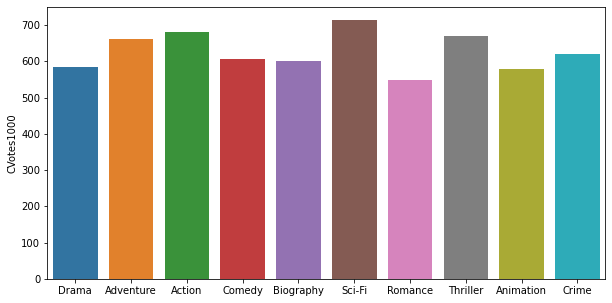

In [0]:
# Bar plot

plt.figure(figsize=(10,5))
sns.barplot(x=genre_top10.index,y=genre_top10["CVotes1000"])

**`Inferences:`** Write your inferences/observations here.
- 1 Sci-Fi still seems to be the highest voted category here as well, as was the case in case of heatmaps
- 2 Same trends seen in the heatmaps are seen here with regards to adventure, action and thriller as them being the next voted genres

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.

## Now complete following scenarios

In [0]:
# Scenario 1: Top 10 movies by IMDb rating

# Assuming df is the DataFrame containing the movie data
# Sort the DataFrame by IMDb rating in descending order and select the top 10 movies
top_10_movies_imdb = df.orderBy('IMDb_rating', ascending=False).limit(10)

# Display the top 10 movies
top_10_movies_imdb.show()



+--------------------+----------+---------+---------+-------------------+-------------------+--------------------+----------------------+----------------------+----------------------+-----------+---------+---------+-------+----------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----------+------------+---------+----------+----------+----------+-----------+-----------+----------+-----------+-----------+---------+----------+----------+----------+--------+---------+------+------+--------+---------+---------+---------+----------+----------+---------+----------+----------+--------+---------+---------+---------+-------+--------+--------------+-------+
|               Title|title_year|   budget|    Gross|       actor_1_name|       actor_2_name|        actor_3_name|actor_1_facebook_likes|actor_2_facebook_likes|actor_3_facebook_likes|IMDb_rating|  genre_1|  genre_2|genre_3|MetaCritic|Runtime|CVotes10|CVotes09|CVotes08|CVotes07|CVotes06|CVotes

In [0]:
# Scenario 2: Movies released after 2010 with rating above 8
# Filter movies released after 2010 with IMDb rating above 8
movies_after_2010_high_rating = df.filter((df['title_year'] > 2010) & (df['IMDb_rating'] > 8))

# Display the filtered movies
movies_after_2010_high_rating.show()


+--------------------+----------+---------+---------+--------------------+-------------------+--------------------+----------------------+----------------------+----------------------+-----------+---------+---------+--------+----------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----------+------------+---------+----------+----------+----------+-----------+-----------+----------+-----------+-----------+---------+----------+----------+----------+--------+---------+------+------+--------+---------+---------+---------+----------+----------+---------+----------+----------+--------+---------+---------+---------+-------+--------+--------------+---------+
|               Title|title_year|   budget|    Gross|        actor_1_name|       actor_2_name|        actor_3_name|actor_1_facebook_likes|actor_2_facebook_likes|actor_3_facebook_likes|IMDb_rating|  genre_1|  genre_2| genre_3|MetaCritic|Runtime|CVotes10|CVotes09|CVotes08|CVotes07|CVotes06|

In [0]:
# Scenario 3: Average rating by genre (splitting genres into individual entries)
from pyspark.sql.functions import explode, col, array

# Explode the genre columns to split the genres into individual entries
df_exploded = df.withColumn('genre', explode(
    array('genre_1', 'genre_2', 'genre_3'))).filter(col('genre').isNotNull())

# Group by genre and calculate the average IMDb rating
average_rating_by_genre = df_exploded.groupBy('genre').avg('IMDb_rating').orderBy('avg(IMDb_rating)', ascending=False)

# Show the result
average_rating_by_genre.show()




+---------+------------------+
|    genre|  avg(IMDb_rating)|
+---------+------------------+
|    Music|              8.35|
|  Western|               8.0|
|   Sci-Fi|7.9999999999999964|
|Animation| 7.927272727272728|
|  History| 7.925000000000001|
|  Mystery|7.9142857142857155|
|Adventure| 7.907894736842107|
| Thriller| 7.884615384615385|
|   Action|  7.88064516129032|
|    Crime| 7.872727272727274|
|   Comedy|  7.86086956521739|
|    Drama| 7.858461538461539|
|Biography| 7.849999999999999|
|  Fantasy| 7.814285714285715|
|    Sport|               7.8|
|  Romance| 7.784615384615386|
|      War|               7.6|
|   Family|               7.6|
|  Musical|               7.6|
|   Horror|               7.6|
+---------+------------------+



In [0]:
# Scenario 4: Number of movies released each year

# Group by the title_year and count the number of movies
movies_per_year = df.groupBy('title_year').count().orderBy('title_year', ascending=True)

# Show the result
movies_per_year.show()


+----------+-----+
|title_year|count|
+----------+-----+
|      2010|   18|
|      2011|   11|
|      2012|   13|
|      2013|   17|
|      2014|   20|
|      2015|   12|
|      2016|    9|
+----------+-----+



In [0]:
# Scenario 5: Top 5 directors with highest average IMDb rating (minimum 5 movies)
# Group by actor_1_name, actor_2_name, and actor_3_name and calculate the count of movies and the average IMDb rating
actors_avg_rating = df.select(
    'actor_1_name', 'actor_2_name', 'actor_3_name', 'IMDb_rating'
).withColumn('actor', F.when(F.col('actor_1_name').isNotNull(), F.col('actor_1_name'))
                     .otherwise(F.when(F.col('actor_2_name').isNotNull(), F.col('actor_2_name'))
                     .otherwise(F.col('actor_3_name'))))

# Group by the actor and calculate the count of movies and the average IMDb rating
actors_avg_rating_grouped = actors_avg_rating.groupBy('actor').agg(
    F.count('IMDb_rating').alias('movie_count'),
    F.avg('IMDb_rating').alias('avg_IMDb_rating')
)

# Filter actors with at least 5 movies
actors_with_min_5_movies = actors_avg_rating_grouped.filter(actors_avg_rating_grouped.movie_count >= 5)

# Sort by the average IMDb rating in descending order and take the top 5
top_5_actors = actors_with_min_5_movies.orderBy('avg_IMDb_rating', ascending=False).limit(5)

# Show the result
top_5_actors.show()


+-----------------+-----------+---------------+
|            actor|movie_count|avg_IMDb_rating|
+-----------------+-----------+---------------+
|Leonardo DiCaprio|          5|            8.3|
+-----------------+-----------+---------------+



In [0]:
# Scenario 6: Movies grouped by content rating and their average durations
# Group by content_rating and calculate the average duration (Runtime)
content_rating_avg_runtime = df.groupBy('content_rating').agg(
    F.avg('Runtime').alias('avg_runtime')
)

# Show the result
content_rating_avg_runtime.show()



+--------------+------------------+
|content_rating|       avg_runtime|
+--------------+------------------+
|            PG|117.08333333333333|
|             R|125.30952380952381|
|             G|             103.0|
|         PG-13|130.46666666666667|
+--------------+------------------+



In [0]:
# Scenario 7: Year with the most movie releases

# Group by year and count the number of movies released
movies_per_year = df.groupBy('title_year').count()

# Sort by count in descending order and get the top result
movies_per_year_sorted = movies_per_year.orderBy(F.col('count').desc())

# Show the result
movies_per_year_sorted.show(1)



+----------+-----+
|title_year|count|
+----------+-----+
|      2014|   20|
+----------+-----+
only showing top 1 row



In [0]:
# Scenario 8: Longest movie per genre
from pyspark.sql import functions as F
from pyspark.sql.functions import col, array, explode

# Step 1: Combine the genre columns into an array
df_with_genres = df.withColumn("genres", array("genre_1", "genre_2", "genre_3"))

# Step 2: Explode the genres array
df_exploded = df_with_genres.withColumn("genre", explode(col("genres")))

# Step 3: Find the maximum runtime per genre
longest_runtime_per_genre = df_exploded.groupBy("genre").agg(
    F.max("Runtime").alias("longest_runtime")
)

# Step 4: Alias dataframes to avoid ambiguity
df_exp = df_exploded.alias("exp")
df_long = longest_runtime_per_genre.alias("long")

# Step 5: Join on genre and runtime
longest_movies = df_exp.join(
    df_long,
    (col("exp.genre") == col("long.genre")) & 
    (col("exp.Runtime") == col("long.longest_runtime")),
    "inner"
).select(
    col("exp.genre").alias("Genre"),
    col("exp.Title").alias("Movie Title"),
    col("exp.Runtime").alias("Runtime")
)

# Step 6: Show the result
longest_movies.show()




+---------+--------------------+-------+
|    Genre|         Movie Title|Runtime|
+---------+--------------------+-------+
|    Music|          La La Land|    128|
|Animation|             Tangled|    124|
|   Action|The Dark Knight R...|    164|
| Thriller|The Dark Knight R...|    164|
|Adventure|The Hobbit: An Un...|    169|
|  Fantasy|The Hobbit: An Un...|    169|
|Animation|          Big Hero 6|    124|
|Animation|How to Train Your...|    124|
|Animation|      Wreck-It Ralph|    124|
|Adventure|        Interstellar|    169|
|    Drama|        Interstellar|    169|
|   Sci-Fi|        Interstellar|    169|
|Animation|How to Train Your...|    124|
|  Western|    Django Unchained|    165|
|Biography|The Wolf of Wall ...|    180|
|   Comedy|The Wolf of Wall ...|    180|
|    Crime|The Wolf of Wall ...|    180|
|  Mystery|The Girl with the...|    158|
|Animation|       Despicable Me|    124|
|      War|                Fury|    134|
+---------+--------------------+-------+
only showing top

In [0]:
# Scenario 9: Movies with budget greater than revenue (loss-making)

# Filter movies where budget is greater than gross
loss_making_movies = df.filter(col("budget") > col("gross"))

# Show relevant columns
loss_making_movies.select("Title", "budget", "gross").show()



+--------------------+---------+---------+
|               Title|   budget|    gross|
+--------------------+---------+---------+
|             Tangled|260000000|200807262|
|    Edge of Tomorrow|178000000|100189501|
|                Hugo|170000000| 73820094|
|  X-Men: First Class|160000000|146405371|
|   The Little Prince| 81200000|  1339152|
|Scott Pilgrim vs....| 60000000| 31494270|
|                Rush| 38000000| 26903709|
|             Warrior| 25000000| 13651662|
|             Flipped| 14000000|  1752214|
|               Amour|  8900000|   225377|
|Tucker and Dale v...|  5000000|   223838|
+--------------------+---------+---------+



In [0]:
# Scenario 10: Most common actor/actress (based on appearances in actor_1_name, actor_2_name, actor_3_name)
from pyspark.sql.functions import col

# Select all actor columns and union them into a single column
actors_df = df.select("actor_1_name").union(df.select("actor_2_name")).union(df.select("actor_3_name"))

# Group by actor name and count appearances
actor_counts = actors_df.groupBy("actor_1_name").count().withColumnRenamed("actor_1_name", "actor_name")

# Sort by count descending
most_common_actors = actor_counts.orderBy(col("count").desc())

# Show top results
most_common_actors.show(10)



+------------------+-----+
|        actor_name|count|
+------------------+-----+
| Leonardo DiCaprio|    5|
|         Tom Hardy|    5|
|Scarlett Johansson|    4|
| Jennifer Lawrence|    4|
|        Emma Stone|    3|
|   Jake Gyllenhaal|    3|
|      James Franco|    3|
|      Jeff Bridges|    3|
|         Tom Hanks|    3|
|      Ryan Gosling|    3|
+------------------+-----+
only showing top 10 rows

